# Problem Statement

- Cluster users based on genres taste using K-Means

## Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Import the Movies dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Import the ratings dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
print("Ratings shape:", ratings.shape)
print("Movies shape:" ,movies.shape)

Ratings shape: (100004, 4)
Movies shape: (9125, 3)


In [5]:
rating_title = pd.merge(ratings,movies[['movieId', 'title']],on=['movieId'])

In [6]:
rating_title.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


In [7]:
user_movie_ratings =  pd.pivot_table(data= rating_title,index='userId', columns='title', values='rating')

In [8]:
user_movie_ratings.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
user_movie_ratings.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            662, 663, 664, 665, 666, 667, 668, 669, 670, 671],
           dtype='int64', name='userId', length=671)

## Issues:

-  Most users have not rated and watched most movies.
- Datasets like this are called "sparse" because only a small number of cells have values.


Exploratory Data Analysis:

    - of all the rated movies by the users, which all movies should be considered for recommendation
    - what should be the count of movies rated by user to recommend it
    - strategy for new movies as new movies have still not been rated by many users
    - strategy to handle users who have not rated many movies
    - strategy to handle user who watched and rated all the movies
    

## Solution:

- sort by the most rated movies, and the users who have rated the most number of movies. That will present a more 'dense' region when we peak at the top of the dataset.

## Get Most Rated Movies

In [10]:
most_rated_movie = user_movie_ratings

In [11]:
most_rated_movie = most_rated_movie.append(user_movie_ratings.count(),ignore_index=True)

In [12]:
most_rated_movies = most_rated_movie.sort_values(len(most_rated_movie)-1,ascending=False,axis=1)

In [13]:
most_rated_movies.tail()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,"Goodbye, Columbus (1969)",Goodbye Lover (1999),"Good, the Bad, the Weird, The (Joheunnom nabbeunnom isanghannom) (2008)","Good Thief, The (2002)","Good Morning, Babylon (1987)",Robin Williams: Weapons of Self Destruction (2009),"Good German, The (2006)","Good Earth, The (1937)",Robot Overlords (2014),İtirazım Var (2014)
667,NaN,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,5.0,5.0,NaN,NaN,4.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,5.0,4.0,5.0,NaN,5.0,NaN,4.5,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,341.0,324.0,311.0,304.0,291.0,274.0,259.0,247.0,244.0,237.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
np.sum(most_rated_movies['Forrest Gump (1994)'].isnull().values == False)

342

In [14]:
most_rated_movies.index

RangeIndex(start=0, stop=672, step=1)

In [15]:
most_rated_movies.iloc[671].values

array([341., 324., 311., ...,   1.,   1.,   1.])

In [16]:
most_rated_movies.iloc[671].index

Index(['Forrest Gump (1994)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Silence of the Lambs, The (1991)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Jurassic Park (1993)',
       'Matrix, The (1999)', 'Toy Story (1995)', 'Schindler's List (1993)',
       'Terminator 2: Judgment Day (1991)',
       ...
       'Goodbye, Columbus (1969)', 'Goodbye Lover (1999)',
       'Good, the Bad, the Weird, The (Joheunnom nabbeunnom isanghannom) (2008)',
       'Good Thief, The (2002)', 'Good Morning, Babylon (1987)',
       'Robin Williams: Weapons of Self Destruction (2009)',
       'Good German, The (2006)', 'Good Earth, The (1937)',
       'Robot Overlords (2014)', 'İtirazım Var (2014)'],
      dtype='object', name='title', length=9064)

In [17]:
data_most_rated_movies = pd.DataFrame([most_rated_movies.iloc[671].index,most_rated_movies.iloc[671].values]).T

In [18]:
data_most_rated_movies.columns = ['Movies','Count']

In [19]:
data_most_rated_movies.Count.describe()

count     9064.0
unique     185.0
top          1.0
freq      3061.0
Name: Count, dtype: float64

In [20]:
data_most_rated_movies.Count.unique()

array([341.0, 324.0, 311.0, 304.0, 291.0, 274.0, 259.0, 247.0, 244.0,
       237.0, 234.0, 228.0, 226.0, 224.0, 220.0, 218.0, 217.0, 215.0,
       213.0, 202.0, 201.0, 200.0, 198.0, 196.0, 193.0, 191.0, 190.0,
       188.0, 180.0, 176.0, 175.0, 174.0, 168.0, 165.0, 164.0, 163.0,
       161.0, 160.0, 158.0, 157.0, 153.0, 151.0, 150.0, 148.0, 147.0,
       146.0, 145.0, 144.0, 142.0, 141.0, 138.0, 137.0, 135.0, 134.0,
       133.0, 132.0, 131.0, 130.0, 129.0, 127.0, 126.0, 125.0, 124.0,
       123.0, 122.0, 121.0, 120.0, 119.0, 118.0, 117.0, 115.0, 114.0,
       113.0, 112.0, 111.0, 110.0, 109.0, 108.0, 107.0, 106.0, 105.0,
       104.0, 103.0, 102.0, 101.0, 100.0, 99.0, 98.0, 97.0, 96.0, 95.0,
       94.0, 93.0, 92.0, 91.0, 90.0, 89.0, 88.0, 87.0, 86.0, 85.0, 84.0,
       83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0,
       72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0,
       61.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0,
      

In [60]:
data_most_rated_movies.Count.size

9064

In [64]:
unique_Values = data_most_rated_movies.Count.unique()

In [104]:
moviesRated_Count_sum = []
for value in unique_Values:
    moviesRated_Count_sum.append(data_most_rated_movies[data_most_rated_movies.Count == value].Count.sum())

In [112]:
moviesRated_Count_df = pd.DataFrame([unique_Values,moviesRated_Count_sum]).T 

In [113]:
moviesRated_Count_df.columns = ['MoviesCount','NumberOfUsersRated']

In [120]:
moviesRated_Count_df.head()

,MoviesCount,NumberOfUsersRated
0,341.0,341.0
1,324.0,324.0
2,311.0,311.0
3,304.0,304.0
4,291.0,291.0


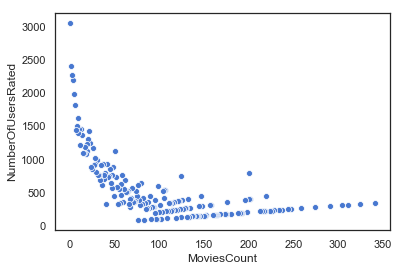

In [119]:
sns.scatterplot(x=moviesRated_Count_df.MoviesCount, y=moviesRated_Count_df.NumberOfUsersRated)


## Get users who rated the most

In [124]:
most_rated_users = most_rated_movies

In [125]:
most_rated_users['counts'] = pd.Series(most_rated_movies.count(axis=1))

In [126]:
most_rated_users = most_rated_users.sort_values('counts', ascending=False)

In [127]:
most_rated_users.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Goodbye Lover (1999),"Good, the Bad, the Weird, The (Joheunnom nabbeunnom isanghannom) (2008)","Good Thief, The (2002)","Good Morning, Babylon (1987)",Robin Williams: Weapons of Self Destruction (2009),"Good German, The (2006)","Good Earth, The (1937)",Robot Overlords (2014),İtirazım Var (2014),counts
671,341.0,324.0,311.0,304.0,291.0,274.0,259.0,247.0,244.0,237.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9064
546,2.0,5.0,5.0,5.0,NaN,3.0,3.5,3.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2391
563,3.0,5.0,NaN,5.0,2.0,5.0,3.0,4.0,4.0,5.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1868
623,3.0,5.0,NaN,5.0,5.0,3.0,2.0,5.0,NaN,3.0,...,NaN,4.0,NaN,NaN,NaN,3.0,NaN,1.5,NaN,1735
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700


In [128]:
most_rated_users.shape

(672, 9065)

In [129]:
most_rated_users.counts.unique()

array([9064, 2391, 1868, 1735, 1700, 1610, 1340, 1291, 1063, 1019, 1011,
        947,  923,  922,  910,  876,  830,  792,  726,  713,  707,  696,
        682,  678,  676,  655,  645,  641,  626,  617,  604,  547,  525,
        522,  521,  518,  513,  504,  487,  485,  483,  437,  436,  434,
        427,  423,  422,  413,  412,  400,  399,  395,  385,  378,  376,
        375,  367,  363,  347,  342,  341,  329,  326,  324,  323,  319,
        315,  314,  312,  311,  308,  307,  305,  303,  302,  300,  299,
        296,  294,  291,  289,  285,  284,  279,  278,  268,  267,  263,
        260,  256,  255,  254,  253,  250,  249,  236,  231,  230,  229,
        225,  224,  223,  222,  220,  219,  218,  217,  216,  215,  214,
        210,  209,  206,  205,  204,  203,  202,  201,  199,  198,  196,
        194,  193,  192,  191,  190,  189,  188,  187,  183,  178,  177,
        176,  172,  170,  169,  168,  166,  163,  162,  161,  160,  159,
        158,  155,  154,  153,  152,  151,  150,  1

In [131]:
most_rated_users.counts.describe()

count     672.000000
mean      162.302083
std       414.311297
min        20.000000
25%        37.000000
50%        71.500000
75%       161.000000
max      9064.000000
Name: counts, dtype: float64

- Some of the users have rated almost all the movies(9064)
- Avg movies rated by 162 users
- Movies rated by min of 20 users


In [137]:
user_index = most_rated_users.index
NumberOfMoviesRated = most_rated_users.counts
df_User_NumberOfMoviesRated = pd.DataFrame([user_index,NumberOfMoviesRated]).T


In [138]:
df_User_NumberOfMoviesRated.head()

,0,1
0,671,9064
1,546,2391
2,563,1868
3,623,1735
4,14,1700


In [139]:
df_User_NumberOfMoviesRated.columns = ['User_Index','NumberOfMoviesRated']

In [147]:
df_User_NumberOfMoviesRated.dtypes

User_Index             int64
NumberOfMoviesRated    int64
dtype: object

In [150]:
df_User_NumberOfMoviesRated.User_Index.astype('category')

0      671
1      546
2      563
3      623
4       14
5       72
6      451
7      467
8      379
9      310
10      29
11     293
12     508
13     579
14     212
15     211
16     471
17     387
18      22
19     456
20     517
21     460
22     231
23     101
24     261
25     474
26     305
27     118
28     653
29     357
      ... 
642    275
643    476
644    650
645    667
646    656
647      0
648    637
649    603
650     13
651     34
652     75
653    208
654    220
655    248
656    288
657    295
658    309
659    318
660    324
661    398
662    437
663    443
664    444
665    447
666    483
667    484
668    497
669    539
670    582
671    336
Name: User_Index, Length: 672, dtype: category
Categories (672, int64): [0, 1, 2, 3, ..., 668, 669, 670, 671]

(0, 704.5510842293907)

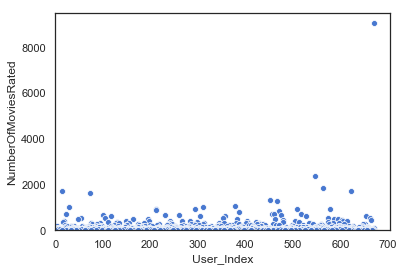

In [188]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=df_User_NumberOfMoviesRated.User_Index,
                y=df_User_NumberOfMoviesRated.NumberOfMoviesRated,                    
                
               sizes = (20, 200), hue_norm=(0, 7),
               palette=cmap,
               )
plt.ylim(0, 9500)
plt.xlim(0, None)




## Hyper parameters
- which movies should be considered to build model
- users who should be considered to build model


In [189]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

In [190]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

In [191]:
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

In [192]:
n_movies = 30
n_users = 18

most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)

In [193]:
most_rated_movies_users_selection

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0
22,4.5,4.5,5.0,4.5,4.5,3.5,4.0,3.0,3.5,3.5,...,2.5,3.5,4.0,4.5,NaN,5.0,4.0,3.5,4.0,4.0
460,4.0,4.5,5.0,5.0,4.5,5.0,4.5,3.5,4.0,5.0,...,4.0,5.0,4.0,5.0,1.5,5.0,4.5,3.0,2.5,NaN
267,5.0,5.0,3.5,5.0,5.0,4.5,4.5,5.0,5.0,5.0,...,NaN,4.5,3.5,4.0,5.0,4.5,5.0,4.5,4.0,3.0
561,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.5,4.0,5.0,...,4.0,4.5,5.0,4.5,4.5,4.0,5.0,4.5,4.0,4.0
354,5.0,4.5,5.0,4.5,5.0,3.5,5.0,3.0,4.0,4.0,...,4.0,5.0,3.5,5.0,4.0,5.0,4.5,3.0,3.5,4.0


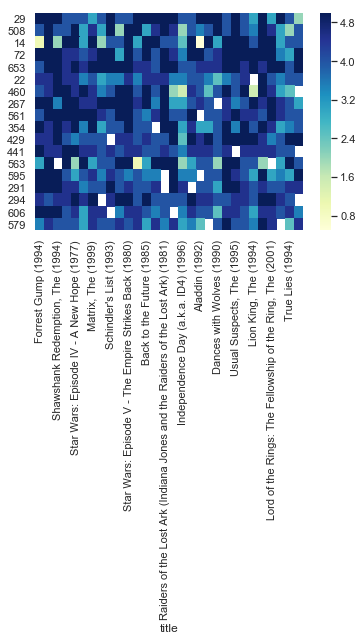

In [194]:
sns.heatmap(most_rated_movies_users_selection,cmap="YlGnBu", annot=False)


- Each column is a movie. Each row is a user. 
- The color of the cell is how the user rated that movie based on the scale on the right of the graph.
- some cells are white. This means the respective user did not rate that movie.
-  k-means generally does not like missing values.

In [195]:
user_movie_ratings.shape

(671, 9064)

To have sklearn run k-means clustering to a dataset with missing values like this, we will first cast it to the sparse csr matrix type defined in the SciPi library.

In [196]:
user_movie_ratings.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

In [198]:
most_rated_movies_1k.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
most_rated_movies_1k.isnull().values.sum()

608603

In [248]:
NumberofElementsNotNullInDataFrame = (671*1000 - most_rated_movies_1k.isnull().values.sum())
print(NumberofElementsNotNullInDataFrame)

62397


In [199]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [200]:
sparse_ratings

<671x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 62397 stored elements in Compressed Sparse Row format>

### Frome above sparse matrix we can see that Null values are not stored as a part of sparse matrix and so now clustering would give a better result for KMeans

In [201]:
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

In [202]:
predictions

array([15,  2, 15, 10,  0, 15, 10, 13, 15, 15, 15, 15, 15, 15,  4, 15, 13,
        9, 17,  5, 17, 13, 18,  5,  9, 11, 15, 15, 15, 16, 15,  5, 15, 17,
       15,  2, 15, 15,  5, 15, 10,  0, 15,  9, 15, 15,  5,  3, 15,  5, 15,
       15, 15, 15,  9, 13, 17, 15, 15, 15,  0, 15, 10,  5, 15, 15,  2,  0,
        0,  9, 15, 11,  4, 15, 10, 15, 12,  3, 15,  9, 15,  5, 10,  0,  2,
        2,  9, 13,  0,  9,  0,  2, 13, 11, 10, 15, 13, 15, 10,  9, 15,  6,
       15,  0, 12, 15, 15,  5, 15,  2, 13,  9,  9,  5, 15, 15, 15, 10,  6,
       10,  2,  5, 15,  0, 13,  5, 15, 10, 15, 12, 15, 15, 15, 12, 15,  0,
       10, 15, 15, 15, 15, 15, 15,  5,  5,  0, 15, 10, 11, 12,  5, 13, 15,
        9, 10, 15,  3, 15, 13, 15,  2,  9, 15, 15, 12, 15, 15,  5,  0, 15,
       15,  5,  9, 15,  0,  0, 10, 13, 15, 15, 15,  2, 15,  5, 10, 15, 13,
        2, 15, 15,  5,  5, 15,  5, 17, 15, 10, 15,  3,  0,  0, 15, 15, 15,
        0, 15, 15, 15, 15, 15,  9,  4,  0, 17, 15, 13, 10, 15, 10, 13, 15,
       15,  9,  5,  5, 15

In [203]:
most_rated_movies_1k_WithClustering = most_rated_movies_1k

In [204]:
most_rated_movies_1k_WithClustering.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
most_rated_movies_1k_WithClustering['group'] = predictions 

In [206]:
most_rated_movies_1k_WithClustering.columns

Index(['Forrest Gump (1994)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Silence of the Lambs, The (1991)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Jurassic Park (1993)',
       'Matrix, The (1999)', 'Toy Story (1995)', 'Schindler's List (1993)',
       'Terminator 2: Judgment Day (1991)',
       ...
       'What Lies Beneath (2000)', 'Roman Holiday (1953)',
       'Motorcycle Diaries, The (Diarios de motocicleta) (2004)',
       'Sophie's Choice (1982)', 'Dawn of the Dead (2004)',
       'Ocean's Thirteen (2007)', 'Seabiscuit (2003)', 'Easy Rider (1969)',
       'Lucky Number Slevin (2006)', 'group'],
      dtype='object', name='title', length=1001)

In [207]:
# Draw heat map for cluster 10

cluster_10 = most_rated_movies_1k_WithClustering[most_rated_movies_1k_WithClustering['group'] == 10]

In [208]:
cluster_10.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006),group
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
6,3.0,NaN,5.0,NaN,5.0,4.0,NaN,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
40,3.5,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
62,NaN,NaN,5.0,4.5,5.0,4.5,4.5,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
74,4.0,NaN,4.0,NaN,4.5,3.0,5.0,3.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [209]:
most_rated_movies_1k_WithClustering.groupby(['group']).groups

{0: Int64Index([  4,  41,  60,  67,  68,  83,  88,  90, 103, 123, 135, 145, 168,
             174, 175, 199, 200, 204, 212, 227, 233, 243, 250, 272, 274, 286,
             315, 323, 332, 338, 381, 401, 416, 417, 425, 455, 457, 472, 478,
             482, 485, 499, 530, 541, 552, 569, 581, 598, 619, 622, 654, 659],
            dtype='int64'),
 1: Int64Index([607], dtype='int64'),
 2: Int64Index([  1,  35,  66,  84,  85,  91, 109, 120, 160, 181, 187, 253, 287,
             337, 343, 384, 395, 415, 486, 495, 515, 533, 547, 589, 592, 601,
             640, 648, 658],
            dtype='int64'),
 3: Int64Index([47, 77, 156, 198, 383, 474, 479, 573, 614, 663], dtype='int64'),
 4: Int64Index([14, 72, 211, 460, 579, 623, 653], dtype='int64'),
 5: Int64Index([ 19,  23,  31,  38,  46,  49,  63,  81, 107, 113, 121, 125, 143,
             144, 150, 167, 171, 183, 190, 191, 193, 223, 224, 240, 260, 265,
             278, 301, 316, 353, 356, 368, 374, 388, 399, 408, 414, 420, 436,
             439, 

In [210]:
cluster_17 = most_rated_movies_1k_WithClustering[most_rated_movies_1k_WithClustering['group'] == 17].drop(['group'],axis =1)

In [211]:
cluster_17.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
18,5.0,5.0,4.0,3.0,4.0,4.0,NaN,3.0,4.0,3.0,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,4.0,3.0,NaN,4.0,3.0,3.0,NaN,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,5.0,NaN,4.0,4.0,NaN,5.0,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
56,3.0,NaN,5.0,NaN,4.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,2.0,3.0,3.0,4.0,5.0,4.0,NaN,NaN,4.0,3.0,...,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN


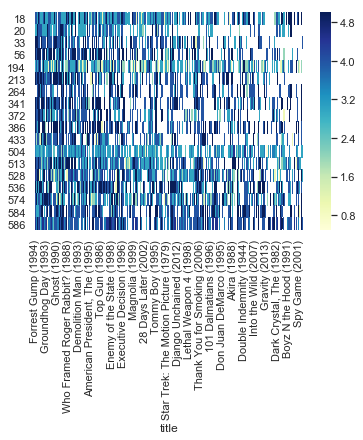

In [212]:
sns.heatmap(cluster_17,cmap= "YlGnBu", annot=False)

## Actual Rating in the cluster 17

In [214]:
cluster_17.fillna('').head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
18,5,5,4,3,4,4,,3,4,3,...,,,5,,,,,,,
20,4,3,,4,3,3,,,5,5,...,,,,,,,,,,
33,,5,,4,4,,5,,4,5,...,,,,,,,,,4,
56,3,,5,,4,,,,5,,...,,,,,,,,,,
194,2,3,3,4,5,4,,,4,3,...,,,2,,2,,,,,


Pick a blank cell from the table. It's blank because that user did not rate that movie. Can we predict whether she would like it or not? Since the user is in a cluster of users that seem to have similar taste, we can take the average of the votes for that movie in this cluster, and that would be a reasonable predicition for much she would enjoy the film.

In [215]:
## Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
movie_name = "Matrix, The (1999)"

cluster_17[movie_name].mean()

3.875

# Recommendation:

- We have used k-means to cluster users according to their ratings
- This lead us to clusters of users with similar ratings and thus generally a similar taste in movies.
- when one user did not have a rating for a certain movie we averaged the ratings of all the other users in the cluster, and that was our guess to how this one user would like the movie.


-  if we calculate the average score in this cluster for every movie, we'd have an understanding for how this 'taste cluster' feels about each movie in the dataset.

In [258]:
cluster_17.mean().head(20)

title
Forrest Gump (1994)                                                               3.333333
Pulp Fiction (1994)                                                               4.115385
Shawshank Redemption, The (1994)                                                  4.433333
Silence of the Lambs, The (1991)                                                  4.000000
Star Wars: Episode IV - A New Hope (1977)                                         4.133333
Jurassic Park (1993)                                                              3.500000
Matrix, The (1999)                                                                3.875000
Toy Story (1995)                                                                  3.857143
Schindler's List (1993)                                                           4.437500
Terminator 2: Judgment Day (1991)                                                 3.888889
Star Wars: Episode V - The Empire Strikes Back (1980)                             3.

This becomes really useful for us because we can now use it as a recommendation engine that enables our users to discover movies they're likely to enjoy.

When a user logs in to our app, we can now show them recommendations that are appropriate to their taste. The formula for these recommendations is to select the cluster's highest-rated movies that the user did not rate yet.

### Recommend movie to user with Id 19 

In [262]:
user_groups = most_rated_movies_1k_WithClustering.groupby(['group']).groups

In [294]:
def GetClusterIndex(user_groups, user_Id):
    for key,value in zip(user_groups.keys(),user_groups.values()):
        if user_Id in value:
            return key

In [296]:
user_cluster = GetClusterIndex(user_groups,19)
user_cluster

5

### User 19 belongs to cluster 5

In [420]:
cluster = most_rated_movies_1k_WithClustering[most_rated_movies_1k_WithClustering['group'] == user_cluster].drop(['group'],axis =1)

In [421]:
cluster.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
19,2.0,0.5,4.5,0.5,1.5,3.0,4.5,3.5,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,5.0,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,4.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
user_19_Rating = most_rated_movies_1k[most_rated_movies_1k.index == 19]

In [351]:
user_19_Rating 

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006),group
19,2.0,0.5,4.5,0.5,1.5,3.0,4.5,3.5,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


## We want to recommend the movies user has not rated

In [408]:
user_19_Rating = user_19_Rating.T

In [418]:
user_19_UnRatedMovies = user_19_Rating[19][user_19_Rating[19].isnull()]

In [419]:
user_19_UnRatedMovies.shape

(926,)

In [424]:
user_19_UnRatedMovies.index

Index(['Terminator 2: Judgment Day (1991)', 'American Beauty (1999)',
       'Usual Suspects, The (1995)', 'Seven (a.k.a. Se7en) (1995)',
       'Saving Private Ryan (1998)',
       'Lord of the Rings: The Two Towers, The (2002)', 'Speed (1994)',
       'Shrek (2001)', 'Mission: Impossible (1996)', 'Groundhog Day (1993)',
       ...
       'Insomnia (2002)', 'What Lies Beneath (2000)', 'Roman Holiday (1953)',
       'Motorcycle Diaries, The (Diarios de motocicleta) (2004)',
       'Sophie's Choice (1982)', 'Dawn of the Dead (2004)',
       'Ocean's Thirteen (2007)', 'Seabiscuit (2003)', 'Easy Rider (1969)',
       'Lucky Number Slevin (2006)'],
      dtype='object', name='title', length=926)

### Top 20 movies to be recommended to user 19

In [432]:
cluster.mean()[user_19_UnRatedMovies.index].sort_values(ascending=False)[:20]


title
Emperor's New Groove, The (2000)                            5.000000
Brazil (1985)                                               5.000000
Hunchback of Notre Dame, The (1996)                         5.000000
Space Jam (1996)                                            5.000000
American Beauty (1999)                                      5.000000
Secrets & Lies (1996)                                       5.000000
2001: A Space Odyssey (1968)                                5.000000
Emma (1996)                                                 5.000000
Minority Report (2002)                                      5.000000
Adventures of Priscilla, Queen of the Desert, The (1994)    5.000000
From Dusk Till Dawn (1996)                                  5.000000
Crumb (1994)                                                5.000000
Equilibrium (2002)                                          5.000000
Contact (1997)                                              5.000000
Brothers McMullen, The (1995

In [434]:
cluster.mean().sort_values(ascending=False)


title
Contact (1997)                                                                    5.000000
Wallace & Gromit: The Wrong Trousers (1993)                                       5.000000
Emma (1996)                                                                       5.000000
Equilibrium (2002)                                                                5.000000
Brazil (1985)                                                                     5.000000
2001: A Space Odyssey (1968)                                                      5.000000
Crumb (1994)                                                                      5.000000
Wallace & Gromit: The Best of Aardman Animation (1996)                            5.000000
Wallace & Gromit: A Close Shave (1995)                                            5.000000
Emperor's New Groove, The (2000)                                                  5.000000
From Dusk Till Dawn (1996)                                                        5.